# CNN
## 1. Library, Data Preprocessing 
## 2. Solve classification with Pytorch
## 3. Show the result 

# Classify folder by class

In [ ]:
import os, shutil

In [ ]:
cls = {(3,5):0,(3,20):1,(4,2):2,(4,7):3,(4,11):4,(5,8):5,(7,1):6,
       (7,20):7,(8,6):8,(8,9):9,(10,20):10,(11,14):11,(13,1):12,
       (13,6):13,(13,9):14,(13,15):15,(13,16):16,(13,17):17,(13,18):18,(13,20):19}

In [ ]:
a = '3_5_1166'
cls[int(a.split('_')[0]),int(a.split('_')[1])] ##THIS!

In [ ]:
os.chdir('./NIPA/train')
lst = []
dct = {}
n = 0 
for f in os.listdir("train"):
    if not f == 'train.tsv':
        n+=1
        folderName = str(cls[int(f.split('_')[0]),int(f.split('_')[1])])
        if folderName in dct:
            dct[folderName] += 1
        else:
            dct[folderName] = 1

        if not os.path.exists(folderName):
            os.mkdir(folderName)
            shutil.copy(os.path.join('train', f), folderName)
        else:
            shutil.copy(os.path.join('train', f), folderName)
print('dct',dct)
print('n:',n)

In [ ]:
dir = './NIPA/train/'
cnt_files = []
for i in range(20):
    list = os.listdir(dir+str(i)) # dir is your directory path
    number_files = len(list)
    cnt_files.append([i,number_files])
print(cnt_files)

# Library

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import torchvision
import torchvision.transforms as transforms # for processing datasets
from torch.utils.data import DataLoader # for making dataset easier to use 

from matplotlib import pyplot as plt
import numpy as np
from sklearn import metrics
import os
from PIL import Image

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("device: gpu") if torch.cuda.is_available() else print("device: cpu")

device: gpu


# Hyper parameter setting

In [ ]:
# hypter parameter setting
learning_rate = 1e-3
training_epochs = 200
display_step = 10
batch_size = 128
activation = nn.ReLU()
max_pool = nn.MaxPool2d(2,2) # kernel size, stride size, padding size 
dropout_rate = 0.5

# Load data & Pre-process data

### Train & Validation data

In [ ]:
trans = transforms.Compose([transforms.Resize(32), transforms.ToTensor()]) 

In [ ]:
dataset = torchvision.datasets.ImageFolder(root = './NIPA/train', transform = trans) 
dataset.__getitem__(0)

(tensor([[[0.0000, 0.0000, 0.0039,  ..., 0.5255, 0.5569, 0.2627],
          [0.0000, 0.0000, 0.0000,  ..., 0.5294, 0.4627, 0.0902],
          [0.0000, 0.0000, 0.0000,  ..., 0.5020, 0.2314, 0.0118],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],
 
         [[0.0000, 0.0000, 0.0039,  ..., 0.5804, 0.5569, 0.2549],
          [0.0000, 0.0000, 0.0000,  ..., 0.5922, 0.4588, 0.0824],
          [0.0000, 0.0000, 0.0000,  ..., 0.5412, 0.2157, 0.0078],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],
 
         [[0.0000, 0.0039, 0.0078,  ..., 0.4784, 0.4549, 0.2196],
          [0.0000, 0.0000, 0.0039,  ..., 0.4824, 0.3882, 0.0784],
          [0.0000, 0.0000, 0.0000,  ...,

In [ ]:
len(dataset)

16000

In [ ]:
classes = dataset.classes
classes

['0',
 '1',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9']

In [ ]:
# train:validation:test = 6:2:2
len(dataset)*(6/8), len(dataset)*(2/8) 

(12000.0, 4000.0)

len(train_data):  12000
len(val_data):  4000
data tensor([[[0.5176, 0.4392, 0.4353],
         [0.5216, 0.4431, 0.4392],
         [0.5255, 0.4471, 0.4431],
         ...,
         [0.5216, 0.4431, 0.4392],
         [0.5294, 0.4510, 0.4471],
         [0.5294, 0.4510, 0.4471]],

        [[0.5176, 0.4392, 0.4353],
         [0.5137, 0.4353, 0.4314],
         [0.5137, 0.4353, 0.4314],
         ...,
         [0.5176, 0.4392, 0.4353],
         [0.5216, 0.4431, 0.4392],
         [0.5216, 0.4431, 0.4392]],

        [[0.5059, 0.4235, 0.4196],
         [0.5098, 0.4314, 0.4275],
         [0.5098, 0.4314, 0.4275],
         ...,
         [0.5137, 0.4353, 0.4314],
         [0.5137, 0.4353, 0.4314],
         [0.5176, 0.4392, 0.4353]],

        ...,

        [[0.5961, 0.5098, 0.5333],
         [0.5804, 0.4941, 0.5137],
         [0.5843, 0.4980, 0.5216],
         ...,
         [0.6157, 0.5373, 0.5490],
         [0.6118, 0.5373, 0.5529],
         [0.6196, 0.5451, 0.5608]],

        [[0.5647, 0.4745, 0.4980

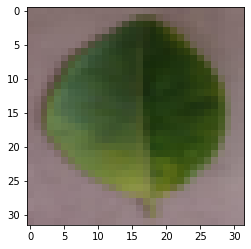

In [ ]:
train_data, val_data = torch.utils.data.random_split(dataset, [int(len(dataset)*(6/8)), int(len(dataset)*(2/8))])

# check the data
print('len(train_data): ', len(train_data))
print('len(val_data): ', len(val_data))

x_train, y_train = train_data[0]
x_train = np.transpose(x_train, (1, 2, 0))

# 32 x 32 x 3

print('data', x_train)
print('data shape: ', x_train.shape)
print('label: ', y_train)

plt.figure()
plt.imshow(x_train)
plt.show()

data shape: torch.Size([128, 3, 32, 32])
label: tensor([ 5, 12,  7, 17, 14,  6,  6,  4,  4, 16,  4,  0,  5,  7, 13,  1, 10, 17,
        15,  7,  5, 10, 14, 10, 17,  4, 19, 18,  8,  0, 13,  7,  9, 18, 19,  6,
        15, 12,  9,  6, 17,  2,  5, 15, 17, 10,  2, 19,  7,  1, 15,  7, 10, 17,
        13,  7,  5,  7, 19,  6,  5, 16,  0,  7, 12,  9,  8, 14, 19,  8,  7, 13,
         4, 17, 10,  2, 19,  7,  0, 13, 12, 16,  0, 16,  2, 16,  5, 18,  6,  9,
        11, 13,  7,  7,  1, 12, 12, 19, 14, 10, 12,  6,  1, 13, 14, 12, 16,  5,
        11,  9, 13, 13,  0, 15, 14, 15, 17,  6, 15, 13,  0, 10, 12, 12, 12, 14,
         5, 18])


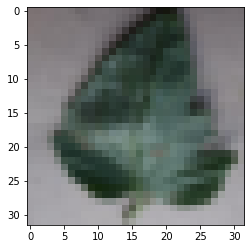

In [ ]:
# Pre-process (batch, shuffle)
train_loader = torch.utils.data.DataLoader(train_data, batch_size = batch_size, shuffle = True, num_workers = 1, drop_last = True)
val_loader = torch.utils.data.DataLoader(val_data, batch_size = batch_size, shuffle = True, num_workers = 1, drop_last = True)

# check the data 
examples = enumerate(train_loader)
batch_idx, (example_data, example_target) = next(examples)

print('data shape:', example_data.shape)
print('label:', example_target)

check_image = example_data[0]
check_image = np.transpose(check_image, (1, 2, 0))

plt.figure()
plt.imshow(check_image)
plt.show()

### Test data

In [ ]:
path_dir = './NIPA/test'
file_list = os.listdir(path_dir)
file_list = [int(file.split('.')[0]) for file in file_list if file.endswith(".jpg")] # .jpg 파일만 리스트로 저장
file_list[:5], len(file_list)

([0, 1, 10, 100, 1000], 4096)

In [ ]:
# index 순서대로 리스트 정렬
file_list.sort()
file_list[:5]

[0, 1, 2, 3, 4]

In [ ]:
file_list = [str(file) + '.jpg' for file in file_list]
file_list

['0.jpg',
 '1.jpg',
 '2.jpg',
 '3.jpg',
 '4.jpg',
 '5.jpg',
 '6.jpg',
 '7.jpg',
 '8.jpg',
 '9.jpg',
 '10.jpg',
 '11.jpg',
 '12.jpg',
 '13.jpg',
 '14.jpg',
 '15.jpg',
 '16.jpg',
 '17.jpg',
 '18.jpg',
 '19.jpg',
 '20.jpg',
 '21.jpg',
 '22.jpg',
 '23.jpg',
 '24.jpg',
 '25.jpg',
 '26.jpg',
 '27.jpg',
 '28.jpg',
 '29.jpg',
 '30.jpg',
 '31.jpg',
 '32.jpg',
 '33.jpg',
 '34.jpg',
 '35.jpg',
 '36.jpg',
 '37.jpg',
 '38.jpg',
 '39.jpg',
 '40.jpg',
 '41.jpg',
 '42.jpg',
 '43.jpg',
 '44.jpg',
 '45.jpg',
 '46.jpg',
 '47.jpg',
 '48.jpg',
 '49.jpg',
 '50.jpg',
 '51.jpg',
 '52.jpg',
 '53.jpg',
 '54.jpg',
 '55.jpg',
 '56.jpg',
 '57.jpg',
 '58.jpg',
 '59.jpg',
 '60.jpg',
 '61.jpg',
 '62.jpg',
 '63.jpg',
 '64.jpg',
 '65.jpg',
 '66.jpg',
 '67.jpg',
 '68.jpg',
 '69.jpg',
 '70.jpg',
 '71.jpg',
 '72.jpg',
 '73.jpg',
 '74.jpg',
 '75.jpg',
 '76.jpg',
 '77.jpg',
 '78.jpg',
 '79.jpg',
 '80.jpg',
 '81.jpg',
 '82.jpg',
 '83.jpg',
 '84.jpg',
 '85.jpg',
 '86.jpg',
 '87.jpg',
 '88.jpg',
 '89.jpg',
 '90.jpg',
 '91.jpg'

In [ ]:
testset = []
for file in file_list:
    path = './NIPA/test/{}'.format(file)
    image = Image.open(path)
    testset.append(image)
testset[0], len(testset)

(<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=256x256 at 0x27908F27848>,
 4096)

In [ ]:
# Make fake image
if len(testset) % batch_size != 0:
    print("len(testset):", len(testset))
    print("batch_size:", batch_size)
    print("len(ttestset) / batch_size:", len(testset) / batch_size)
    print("We need data", (int(len(testset) / batch_size) + 1) * batch_size)
    fake_data_size = (int(len(testset) / batch_size) + 1) * batch_size - len(testset)
    print("We should make fake data", fake_data_size)
    
    fake_file_name_list = [str(index) + '.jpg' for index in list(range(len(testset), len(testset) + fake_data_size))]
    # fake_file_name_list[:3]
    
    for fake_file_name in fake_file_name_list:
    fake_img = Image.new('RGB', (256, 256))
    fake_img.save('./NIPA/test/{}'.format(fake_file_name))
    
    testset = []
    for file in file_list:
        path = './NIPA/test/{}'.format(file)
        image = Image.open(path)
        testset.append(image)
    print(testset[0], len(testset))

len(test_data): 3997
batch_size: 128
len(test_data) / batch_size: 31.2265625
We need data 4096
We should make fake data 99


In [ ]:
trans = transforms.Compose([transforms.Resize(32), transforms.ToTensor()]) 

In [ ]:
class CustomDataset(torch.utils.data.Dataset): 
    def __init__(self, transform):
        self.x_data = testset
        self.transform = transform
        
    def __len__(self):
        return len(self.x_data)
    
    def __getitem__(self, idx): 
        x = self.x_data[idx]
        x = self.transform(x)
        return x

In [ ]:
test_data = CustomDataset(trans)
test_loader = DataLoader(test_data, batch_size = batch_size, drop_last = True)

In [ ]:
test_data.__getitem__(0)

tensor([[[0.0000, 0.0000, 0.1686,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.2078,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.1882,  ..., 0.0000, 0.0000, 0.0000],
         ...,
         [0.4392, 0.3843, 0.3843,  ..., 0.0000, 0.0000, 0.0000],
         [0.4784, 0.3961, 0.3333,  ..., 0.0000, 0.0000, 0.0000],
         [0.4000, 0.3765, 0.3686,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.0000, 0.0000, 0.1922,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.2314,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.2118,  ..., 0.0000, 0.0000, 0.0000],
         ...,
         [0.4667, 0.4510, 0.4196,  ..., 0.0000, 0.0000, 0.0000],
         [0.4706, 0.4275, 0.4000,  ..., 0.0000, 0.0000, 0.0000],
         [0.4314, 0.3922, 0.3569,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.0000, 0.0000, 0.1686,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.2078,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.1882,  ..., 0.0000, 0.0000, 0.

In [ ]:
test_data[0].shape

torch.Size([3, 32, 32])

# Model & Optimization and Loss function

### VGG 19

In [1]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__() # for initializing nn.Module (parent class)
        self.feature_extraction = nn.Sequential(
            
            # 3 x 32 x 32
            nn.Conv2d(3, 64, 3, padding=1),
            nn.BatchNorm2d(64),
            nn.Dropout(dropout_rate),
            activation,
            nn.Conv2d(64, 64, 3, padding=1), 
            nn.BatchNorm2d(64),
            activation,        
            max_pool,
            
            # 64 x 16 x 16
            nn.Conv2d(64, 128, 3, padding=1),
            nn.BatchNorm2d(128),
            nn.Dropout(dropout_rate),
            activation,
            nn.Conv2d(128, 128, 3, padding=1),
            nn.BatchNorm2d(128),
            activation,
            max_pool,
            
            # 128 x 8 x 8
            nn.Conv2d(128, 256, 3, padding=1),
            nn.BatchNorm2d(256),
            nn.Dropout(dropout_rate),
            activation,
            nn.Conv2d(256, 256, 3, padding=1),
            nn.BatchNorm2d(256),
            nn.Dropout(dropout_rate),
            activation,
            nn.Conv2d(256, 256, 3, padding=1),
            nn.BatchNorm2d(256),
            activation,
            max_pool,
            
            # 256 x 4 x 4
            nn.Conv2d(256, 512, 3, padding=1),
            nn.BatchNorm2d(512),
            nn.Dropout(dropout_rate),
            activation,
            nn.Conv2d(512, 512, 3, padding=1),
            nn.BatchNorm2d(512),
            nn.Dropout(dropout_rate),
            activation,
            nn.Conv2d(512, 512, 3, padding=1),
            nn.BatchNorm2d(512),
            activation,
            max_pool,
            
            # 512 x 2 x 2
            
            nn.Conv2d(512, 512, 3, padding=1),
            nn.BatchNorm2d(512),
            nn.Dropout(dropout_rate),
            activation,
            nn.Conv2d(512, 512, 3, padding=1),
            nn.BatchNorm2d(512),
            nn.Dropout(dropout_rate),
            activation,
            nn.Conv2d(512, 512, 3, padding=1),
            nn.BatchNorm2d(512),
            nn.Dropout(dropout_rate),
            activation,
            max_pool,
            
            # 512 x 1 x 1
        )
        self.classifier = nn.Sequential(
            nn.Linear(512, 100),
            nn.Dropout(dropout_rate),
            activation,
            nn.Linear(100, 50),
            activation,
            nn.Linear(50, 20),
        )
    def forward(self, x):
        extracted_feature = self.feature_extraction(x)
        flatten = extracted_feature.view(batch_size, -1)
        result = self.classifier(flatten)
        return result

model = CNN().to(device)
model.train()
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

NameError: ignored

# Train & Validate

In [ ]:
loss_array = []

# train the model
for i in range(training_epochs):
    for index, [data, label] in enumerate(train_loader):
        data = data.to(device)
        label = label.to(device)
                
        optimizer.zero_grad()
        output = model.forward(data)
        loss = loss_function(output, label)
        loss.backward()
        optimizer.step()
        
    if i % display_step == 0:
        print('{} epoch loss: {}'.format(i,loss))
        loss_array.append(loss.cpu().detach().numpy())

0 epoch loss: 2.7556192874908447
10 epoch loss: 1.1767232418060303
20 epoch loss: 0.4968261122703552
30 epoch loss: 0.22713954746723175
40 epoch loss: 0.273678183555603
50 epoch loss: 0.19285260140895844
60 epoch loss: 0.05315320938825607
70 epoch loss: 0.04999764636158943
80 epoch loss: 0.1477738469839096
90 epoch loss: 0.0563848502933979
100 epoch loss: 0.05987163633108139
110 epoch loss: 0.04456301033496857
120 epoch loss: 0.14561258256435394
130 epoch loss: 0.09458412975072861
140 epoch loss: 0.10732150077819824
150 epoch loss: 0.035069067031145096
160 epoch loss: 0.00909106619656086
170 epoch loss: 0.035251371562480927
180 epoch loss: 0.012833412736654282
190 epoch loss: 0.02139662206172943


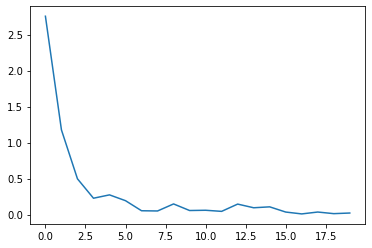

In [ ]:
plt.figure()
plt.plot(loss_array)
plt.show()

### Accuracy

In [ ]:
# validate the model
model.eval()
correct = 0
total = 0

prediction_list = []
label_list = []

with torch.no_grad():
    for index, [data, label] in enumerate(val_loader):
        data = data.to(device)
        label = label.to(device)
        
        output = model.forward(data)
        _, prediction_index = torch.max(output, 1)
        
        prediction_list.append(prediction_index)
        label_list.append(label)
        
        total += label.size(0)
        correct += (prediction_index == label).sum().float()
        
        val_accuracy = correct/total

print("Validation accuraccy: {}".format(val_accuracy))

Validation accuraccy: 0.9551411271095276


In [ ]:
len(prediction_list), len(label_list)

(31, 31)

In [ ]:
y_pred = []
for prediction in prediction_list:
    prediction = prediction.tolist()
    y_pred += prediction
y_pred

[13,
 16,
 3,
 11,
 9,
 14,
 1,
 16,
 3,
 9,
 1,
 10,
 16,
 7,
 16,
 3,
 0,
 6,
 2,
 7,
 0,
 11,
 10,
 6,
 15,
 4,
 6,
 9,
 1,
 19,
 11,
 6,
 9,
 6,
 5,
 3,
 5,
 4,
 9,
 17,
 11,
 8,
 5,
 8,
 11,
 1,
 10,
 6,
 11,
 5,
 19,
 8,
 6,
 9,
 6,
 14,
 17,
 13,
 1,
 18,
 1,
 18,
 13,
 10,
 18,
 16,
 18,
 9,
 16,
 11,
 15,
 12,
 1,
 11,
 15,
 9,
 7,
 3,
 0,
 4,
 16,
 4,
 11,
 17,
 17,
 14,
 9,
 9,
 8,
 2,
 11,
 2,
 18,
 4,
 10,
 5,
 1,
 11,
 16,
 16,
 17,
 19,
 14,
 7,
 10,
 6,
 14,
 7,
 17,
 1,
 8,
 15,
 12,
 2,
 9,
 3,
 4,
 8,
 9,
 7,
 19,
 13,
 0,
 19,
 15,
 3,
 1,
 13,
 15,
 9,
 14,
 18,
 19,
 3,
 7,
 11,
 11,
 12,
 6,
 2,
 14,
 0,
 4,
 5,
 8,
 3,
 12,
 13,
 4,
 9,
 10,
 7,
 2,
 17,
 18,
 17,
 1,
 11,
 13,
 2,
 16,
 17,
 8,
 18,
 5,
 0,
 2,
 9,
 10,
 6,
 13,
 8,
 13,
 0,
 13,
 16,
 0,
 2,
 9,
 17,
 11,
 4,
 11,
 2,
 2,
 11,
 11,
 15,
 12,
 11,
 7,
 12,
 8,
 3,
 5,
 2,
 4,
 19,
 8,
 11,
 5,
 19,
 1,
 8,
 8,
 16,
 4,
 12,
 19,
 9,
 9,
 13,
 15,
 8,
 7,
 19,
 18,
 12,
 14,
 14,
 4,
 13,
 11,
 

In [ ]:
y_true = []
for label in label_list:
    label = label.tolist()
    y_true += label
y_true

[13,
 16,
 3,
 11,
 9,
 14,
 1,
 16,
 3,
 9,
 1,
 10,
 16,
 7,
 16,
 3,
 0,
 6,
 2,
 7,
 0,
 11,
 10,
 6,
 15,
 4,
 6,
 9,
 1,
 19,
 11,
 6,
 9,
 6,
 5,
 3,
 5,
 4,
 9,
 17,
 11,
 8,
 5,
 8,
 11,
 3,
 10,
 6,
 11,
 5,
 19,
 8,
 6,
 9,
 5,
 14,
 17,
 13,
 1,
 18,
 1,
 18,
 13,
 10,
 18,
 16,
 18,
 9,
 16,
 11,
 15,
 12,
 1,
 11,
 15,
 9,
 7,
 3,
 0,
 4,
 16,
 4,
 11,
 17,
 17,
 14,
 5,
 9,
 8,
 2,
 11,
 2,
 18,
 4,
 10,
 5,
 1,
 11,
 16,
 16,
 17,
 19,
 14,
 7,
 10,
 6,
 14,
 7,
 17,
 0,
 8,
 15,
 12,
 2,
 9,
 3,
 4,
 5,
 9,
 7,
 19,
 13,
 0,
 19,
 15,
 3,
 1,
 13,
 15,
 9,
 14,
 18,
 19,
 3,
 7,
 6,
 11,
 12,
 6,
 2,
 14,
 0,
 4,
 5,
 8,
 3,
 12,
 13,
 4,
 9,
 10,
 7,
 2,
 17,
 18,
 17,
 1,
 11,
 13,
 2,
 16,
 17,
 8,
 7,
 5,
 0,
 2,
 9,
 10,
 6,
 13,
 8,
 13,
 0,
 13,
 16,
 0,
 2,
 9,
 17,
 11,
 4,
 11,
 2,
 2,
 11,
 11,
 15,
 12,
 11,
 7,
 12,
 8,
 3,
 5,
 2,
 4,
 19,
 8,
 11,
 5,
 16,
 1,
 8,
 8,
 16,
 4,
 12,
 19,
 9,
 9,
 13,
 15,
 8,
 7,
 19,
 18,
 12,
 14,
 14,
 4,
 13,
 11,
 19

### F1 score

In [ ]:
# 'macro' : multiclass + data balance
metrics.f1_score(y_true, y_pred, average='macro')

0.9540864696859316

# Test

In [ ]:
# test the model
model.eval()
prediction_list = []

with torch.no_grad():
    for index, data in enumerate(test_loader):
        data = data.to(device)
        
        output = model.forward(data)
        _, prediction_index = torch.max(output, 1)
        
        prediction_list.append(prediction_index)

prediction_list

[tensor([ 0,  1, 12, 13, 14, 15, 17, 18, 19,  2,  3,  4,  5,  2,  7,  8,  9, 10,
         11, 16,  0,  1, 12, 13, 14, 15, 17, 18, 19,  2,  3,  4,  5, 11,  7,  8,
          9, 10, 11,  7,  0,  1, 12, 13, 14, 15, 17, 18, 19,  2,  8,  4,  4,  6,
          7,  8,  9, 10, 11, 16,  0,  1, 12, 13, 14, 15, 17, 18, 19,  2,  3,  4,
          5,  6,  7,  8,  8, 10, 11, 16,  0,  1, 12, 13, 14, 15, 17, 18, 19,  2,
          3,  4,  5,  6,  7,  8,  9, 10, 11, 16,  0,  1, 12, 13, 14, 15, 17, 18,
         19,  2,  3,  4,  5,  6, 15,  8,  2, 10, 11, 16,  0,  1, 14, 13, 14, 15,
          2, 18], device='cuda:0'),
 tensor([19,  2,  3,  4,  5,  6,  7,  8,  9,  4, 11, 16,  0,  1, 12, 13, 14, 15,
         17, 18, 19,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 16,  0,  1, 13, 13,
         14, 15, 17, 18, 19,  2,  3,  4,  6, 15,  7,  9,  9, 10, 11, 16,  0,  1,
         12, 13, 14, 15, 17, 18,  2,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 16,
          0,  1, 12, 13, 14, 15, 17, 18, 19,  2,  3,  4,  5, 11,  7,  8, 

In [ ]:
len(prediction_list)

32

### Save test.tsv to sub.tsv

In [ ]:
y_pred_test = []
for prediction in prediction_list:
    prediction = prediction.tolist()
    y_pred_test += prediction
y_pred_test[:3], len(y_pred_test)

([0, 1, 12], 4096)

In [ ]:
cls = {(3,5):0,(3,20):1,(4,2):2,(4,7):3,(4,11):4,(5,8):5,(7,1):6,
       (7,20):7,(8,6):8,(8,9):9,(10,20):10,(11,14):11,(13,1):12,
       (13,6):13,(13,9):14,(13,15):15,(13,16):16,(13,17):17,(13,18):18,(13,20):19}

In [ ]:
inv_cls = {v: k for k, v in cls.items()}
inv_cls

{0: (3, 5),
 1: (3, 20),
 2: (4, 2),
 3: (4, 7),
 4: (4, 11),
 5: (5, 8),
 6: (7, 1),
 7: (7, 20),
 8: (8, 6),
 9: (8, 9),
 10: (10, 20),
 11: (11, 14),
 12: (13, 1),
 13: (13, 6),
 14: (13, 9),
 15: (13, 15),
 16: (13, 16),
 17: (13, 17),
 18: (13, 18),
 19: (13, 20)}

In [ ]:
new_line_list = []
with open('./NIPA/test/test.tsv', 'r') as f:
    line = f.readline()
    for pred in y_pred_test:
        if not line:
            break
        # print("pred:", pred)
        for classify_class in inv_cls.keys():
            # print("classify_class:", classify_class)
            if pred == classify_class:
                plant_label, disease_label = inv_cls[classify_class]
                new_line = '{}\t{}\t{}\n'.format(line.rstrip(), plant_label, disease_label)
                print("new_line:", new_line)
                new_line_list.append(new_line)
                line = f.readline()

new_line: 0.jpg	3	5

new_line: 1.jpg	3	20

new_line: 2.jpg	13	1

new_line: 3.jpg	13	6

new_line: 4.jpg	13	9

new_line: 5.jpg	13	15

new_line: 6.jpg	13	17

new_line: 7.jpg	13	18

new_line: 8.jpg	13	20

new_line: 9.jpg	4	2

new_line: 10.jpg	4	7

new_line: 11.jpg	4	11

new_line: 12.jpg	5	8

new_line: 13.jpg	4	2

new_line: 14.jpg	7	20

new_line: 15.jpg	8	6

new_line: 16.jpg	8	9

new_line: 17.jpg	10	20

new_line: 18.jpg	11	14

new_line: 19.jpg	13	16

new_line: 20.jpg	3	5

new_line: 21.jpg	3	20

new_line: 22.jpg	13	1

new_line: 23.jpg	13	6

new_line: 24.jpg	13	9

new_line: 25.jpg	13	15

new_line: 26.jpg	13	17

new_line: 27.jpg	13	18

new_line: 28.jpg	13	20

new_line: 29.jpg	4	2

new_line: 30.jpg	4	7

new_line: 31.jpg	4	11

new_line: 32.jpg	5	8

new_line: 33.jpg	11	14

new_line: 34.jpg	7	20

new_line: 35.jpg	8	6

new_line: 36.jpg	8	9

new_line: 37.jpg	10	20

new_line: 38.jpg	11	14

new_line: 39.jpg	7	20

new_line: 40.jpg	3	5

new_line: 41.jpg	3	20

new_line: 42.jpg	13	1

new_line: 43.jpg	13	6

In [ ]:
new_line_list[-1]

'3996.jpg\t11\t14\n'

In [ ]:
len(new_line_list)

3997

In [ ]:
with open('./NIPA/test/sub.tsv', 'w') as f:
    for new_line in new_line_list:
        f.write(new_line)

In [ ]:
# sub.to_csv('sub.tsv', index=False, header=None, sep='\t')

# Model save

In [ ]:
# save
torch.save(model.state_dict(), './NIPA/9141.pth')

In [ ]:
# load
model = CNN().to(device)
model.load_state_dict(torch.load("./NIPA/9141.pth"))

<All keys matched successfully>

In [ ]:
# model load test
new_model.eval()
correct = 0
total = 0

prediction_list = []
label_list = []

with torch.no_grad():
    for index, [data, label] in enumerate(val_loader):
        data = data.to(device)
        label = label.to(device)
        
        output = new_model.forward(data)
        _, prediction_index = torch.max(output, 1)
        
        prediction_list.append(prediction_index)
        label_list.append(label)
        
        total += label.size(0)
        correct += (prediction_index == label).sum().float()
        
        val_accuracy = correct/total

print("Validation accuraccy: {}".format(val_accuracy))